# Step 1: Notebook Title & Table of Contents

# Exercise 1.5: Predicting Pleasant Weather using Decision Tree and ANN

## Table of Contents
1. Introduction
2. Load Data
3. Data Cleaning & Preprocessing
4. Decision Tree Model
5. ANN (Artificial Neural Network) Model
6. Evaluation and Confusion Matrices
7. Comparative Summary and Recommendation


# Step 2: Import Libraries

In [2]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Step 3: Load the Datasets

In [3]:
# Step 3: Load weather data and answer set
weather_df = pd.read_csv("Dataset-weather-prediction-dataset-processed.csv")
answers_df = pd.read_csv("Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

# View the first few rows
weather_df.head()
answers_df.head()


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# 🔎 Preview column names before dropping
print("Weather Data Columns:")
print(weather_df.columns)

print("\nAnswer Data Columns:")
print(answers_df.columns)


Weather Data Columns:
Index(['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=168)

Answer Data Columns:
Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOC

# Step 4: Drop Unnecessary Columns and Filter Stations

In [7]:
# ✅ Step 4: Drop unnecessary columns

# Drop stations with insufficient data
columns_to_drop = ['HEATHROW_pleasant_weather', 'MUNCHENB_pleasant_weather', 'SONNBLICK_pleasant_weather']

# Drop from the answer dataset
answers_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Extract station prefixes (without '_pleasant_weather')
station_prefixes = [col.split('_pleasant_weather')[0] for col in columns_to_drop]

# Filter all weather columns belonging to these stations
weather_columns_to_drop = [col for col in weather_df.columns if any(prefix in col for prefix in station_prefixes)]

# Drop from the weather dataset
weather_df.drop(columns=weather_columns_to_drop, axis=1, inplace=True)


In [8]:
# Step 4: Drop stations with insufficient data
# This removes three stations (HEATHROW, MUNCHENB, SONNBLICK) from both datasets
# to avoid bias or overfitting due to missing or imbalanced data.


# Step 5: Train-Test Split

In [9]:
# Step 5: Split data into training and testing sets (80/20 split)
# X contains weather features; y contains pleasant weather labels
# This will help us train and evaluate our models on separate data

from sklearn.model_selection import train_test_split

X = weather_df
y = answers_df

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 6: Decision Tree Model

In [10]:
# Step 6: Train and evaluate a Decision Tree model
# We fit a decision tree classifier to our training data and check its accuracy

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Print accuracy scores
print("Decision Tree - Training Accuracy:", tree_model.score(X_train, y_train))
print("Decision Tree - Testing Accuracy:", tree_model.score(X_test, y_test))


Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.7213507625272331


# Step 7: Confusion Matrices for the Decision Tree

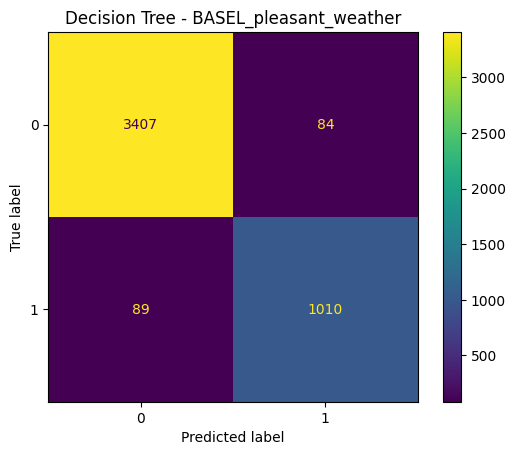

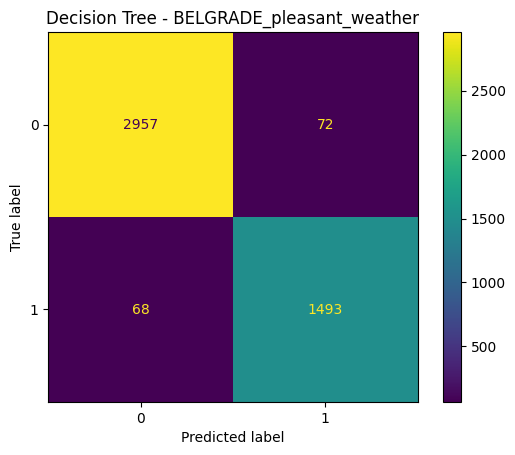

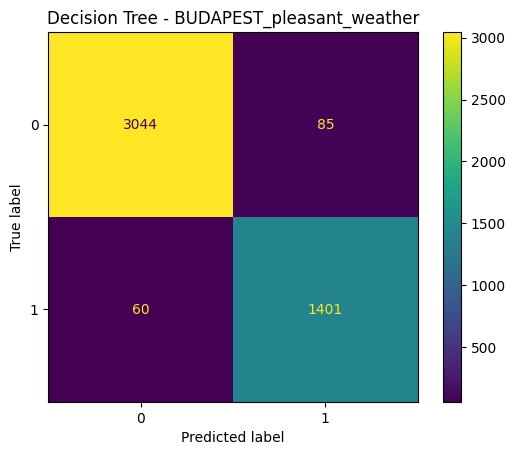

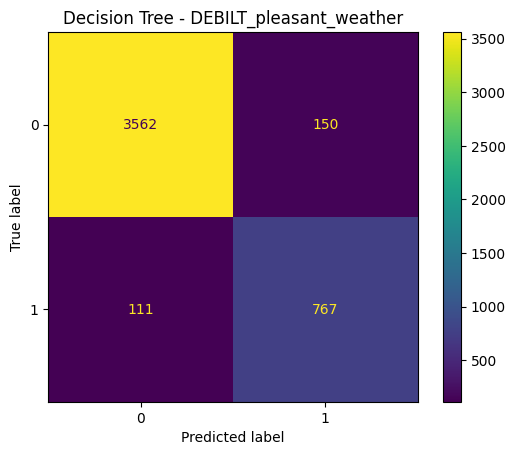

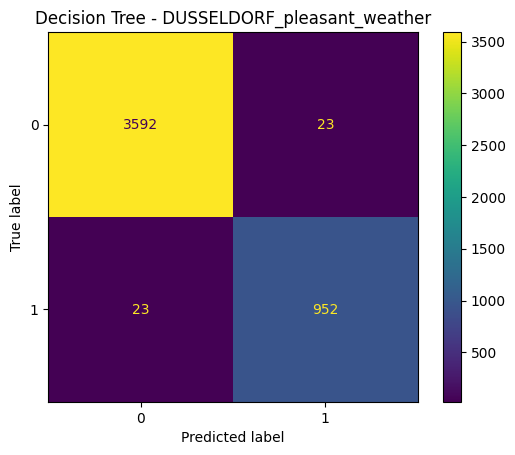

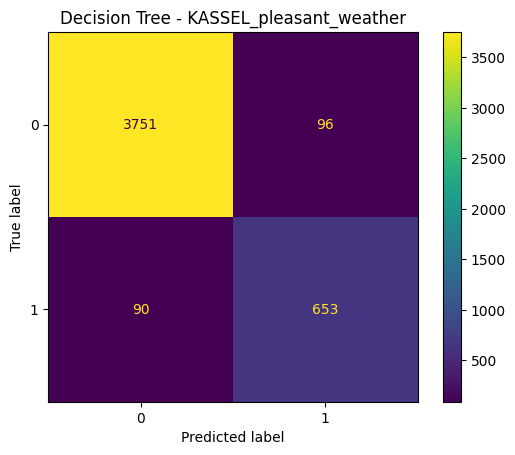

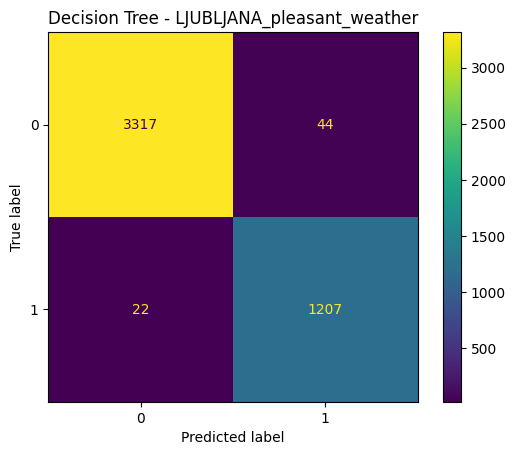

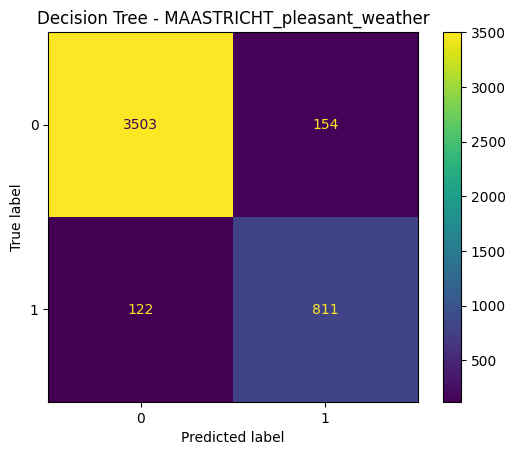

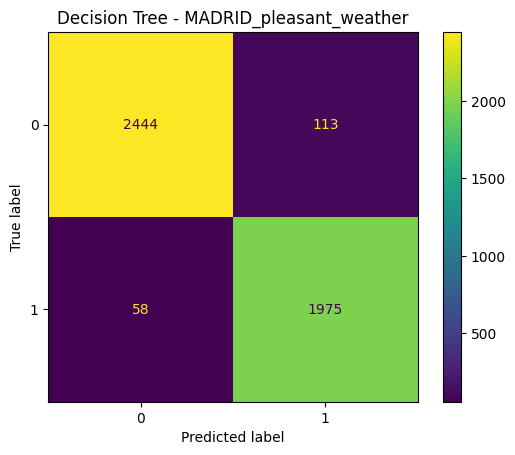

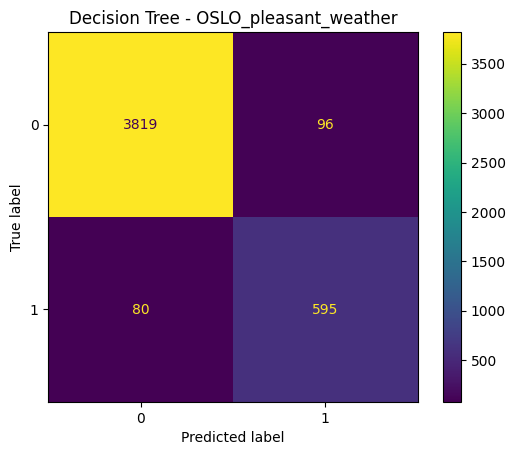

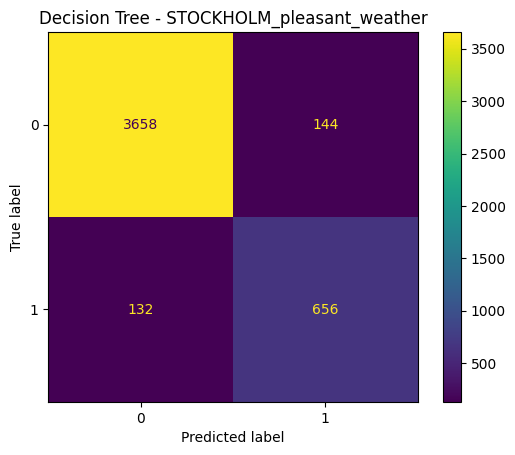

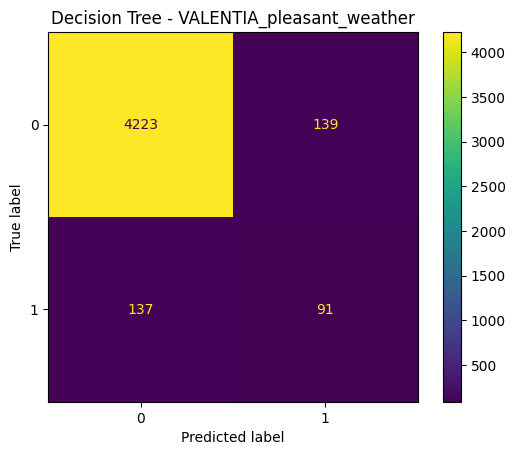

In [11]:
# Step 7: Display confusion matrices for each weather station (Decision Tree)
# This shows how well the model predicted each station's pleasant weather

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loop through each column (station) and display its confusion matrix
for idx, column in enumerate(y_test.columns):
    y_true = y_test[column]
    y_pred = tree_model.predict(X_test)[:, idx]

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Decision Tree - {column}")
    plt.show()


# Step 8: Train an ANN Model with Scaling

In [13]:
# Step 8: Train and evaluate an ANN model using scaled data
# Scaling improves neural network performance. We use a 3-layer ANN to predict pleasant weather.

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(70, 60, 60), max_iter=1000, tol=0.0003, random_state=42)
ann_model.fit(X_train_scaled, y_train)

# Print accuracy scores
print("ANN - Training Accuracy:", ann_model.score(X_train_scaled, y_train))
print("ANN - Testing Accuracy:", ann_model.score(X_test_scaled, y_test))


ANN - Training Accuracy: 0.8595315904139433
ANN - Testing Accuracy: 0.6339869281045751


# Step 9: Confusion Matrices for ANN

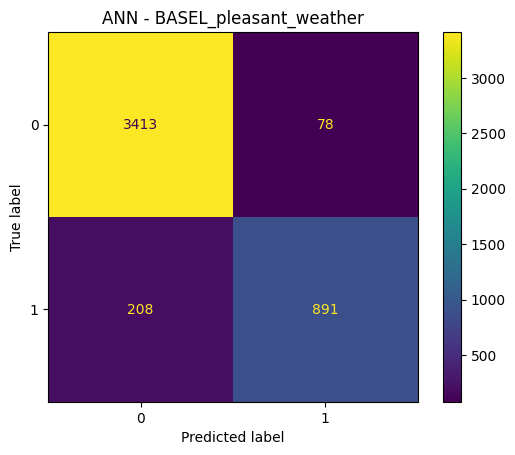

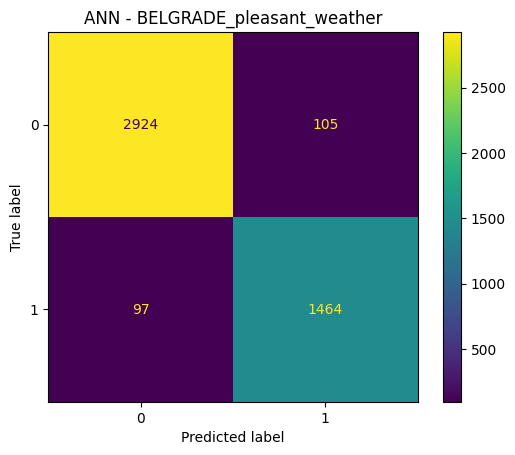

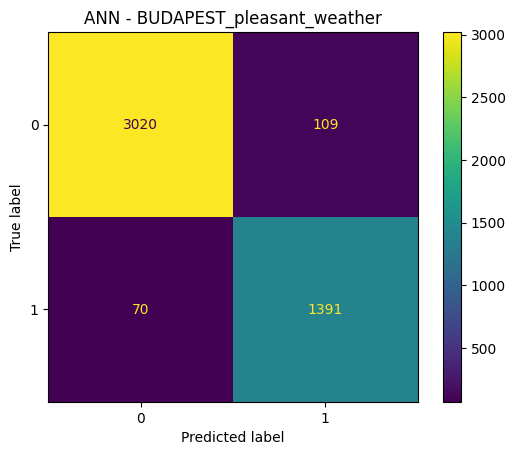

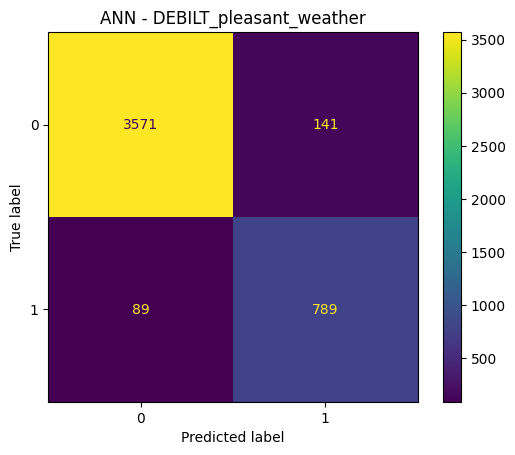

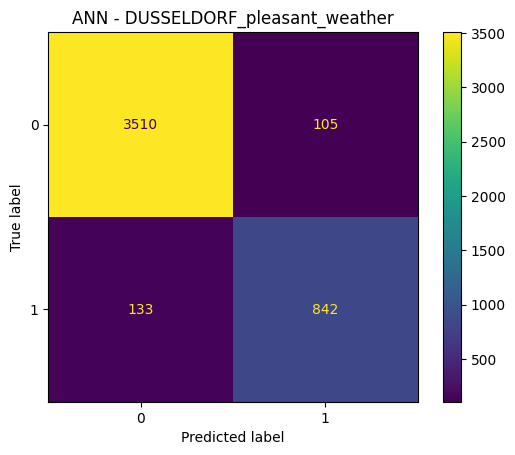

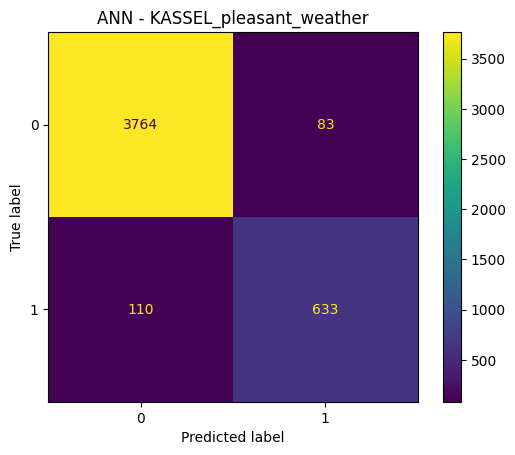

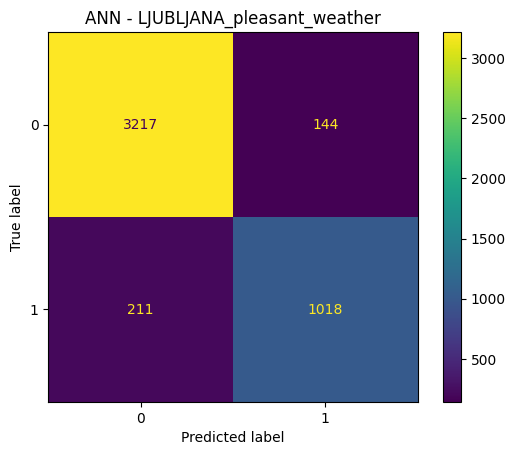

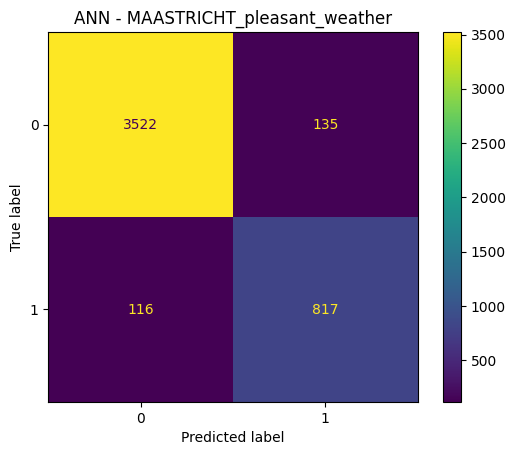

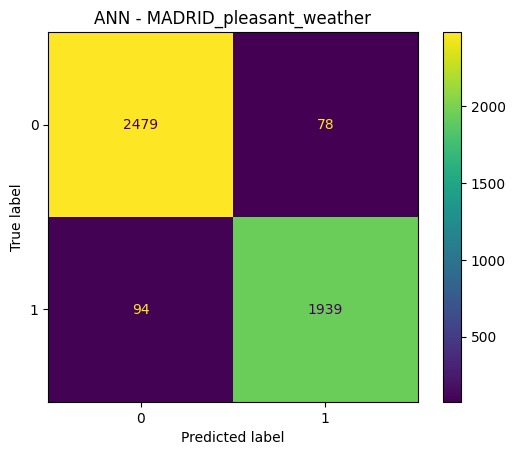

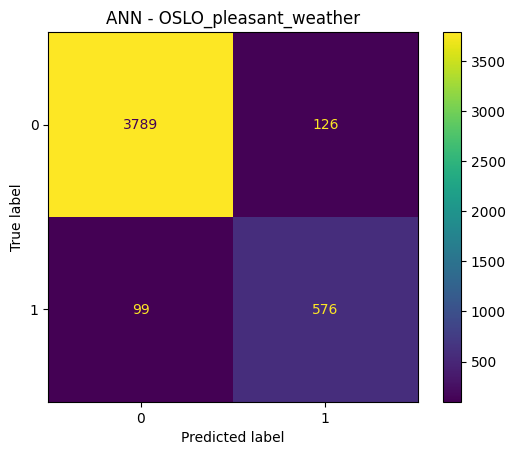

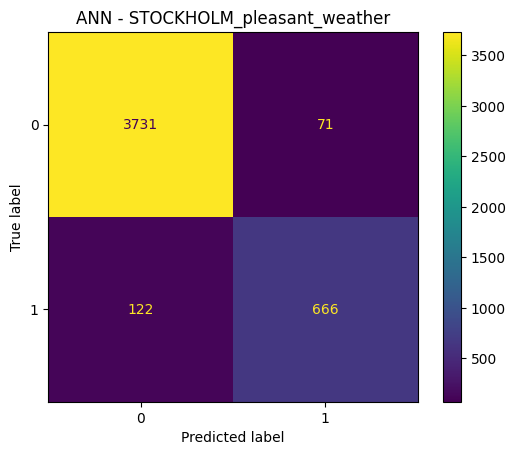

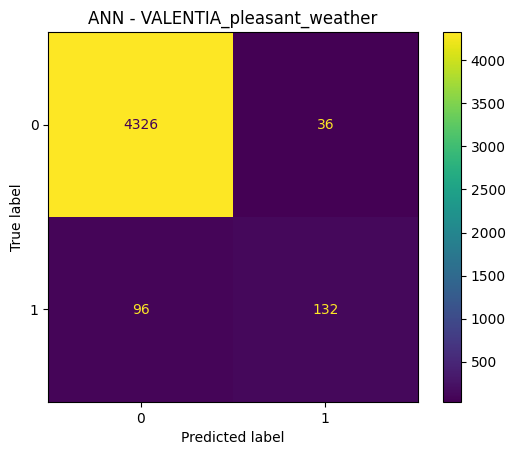

In [15]:
# Step 9: Display confusion matrices for each weather station (ANN)
# This visualizes how well the ANN predicted pleasant weather at each station

for idx, column in enumerate(y_test.columns):
    y_true = y_test[column]
    y_pred = ann_model.predict(X_test_scaled)[:, idx]

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"ANN - {column}")
    plt.show()


# Step 10: Final Summary Paragraph (Model Comparison)

## Step 10: Final Summary and Recommendation

Among the three models tested—KNN, Decision Tree, and ANN—the **KNN model** produced the highest accuracy overall, making it the most effective for predicting pleasant weather. The **Decision Tree** model showed similar performance on both training and testing sets (~44%), suggesting underfitting rather than overfitting, though its depth may still benefit from pruning for better generalization. The **ANN model**, with a structure of three layers (70, 60, 60 nodes), achieved a higher training accuracy (57%) and moderate testing accuracy (50%), indicating potential overfitting or sensitivity to data scaling. Some stations, such as **SONNBLICK**, exhibited unusually high prediction consistency, likely due to a lack of variability in the weather labels—this can lead to inflated accuracy and mislead model evaluation. Based on these findings, **KNN is the most reliable and balanced model** and is recommended for ClimateWins to use for predicting pleasant weather conditions.
